In [1]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The code above mounts the Google Drive to Colab, allowing access to files stored in  Drive at the specified path (/content/drive).

In [2]:
# Specify the dataset path

dataset_name = " Wild Animal Dataset "
data_path = "/content/drive/MyDrive/DATASET/Animals"


The code above specifies the dataset name and path to the "Wild Animal Dataset" stored in my Google Drive at /content/drive/MyDrive/DATASET/Animals.

In [3]:
# Import necessary libraries

import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm
import os

The code above imports essential libraries such as OpenCV, Matplotlib, NumPy, random, tqdm, and os for image processing, visualization, and file handling

In [4]:
for c in os.listdir(data_path):
    print("Category:", c)

    path = os.path.join(data_path, c)
    print("Path:", path)

    class_index = os.listdir(data_path).index(c)
    print("Class index:", class_index)



Category: Cheetah
Path: /content/drive/MyDrive/DATASET/Animals/Cheetah
Class index: 0
Category: Jaguar
Path: /content/drive/MyDrive/DATASET/Animals/Jaguar
Class index: 1
Category: Tiger
Path: /content/drive/MyDrive/DATASET/Animals/Tiger
Class index: 2
Category: Lion
Path: /content/drive/MyDrive/DATASET/Animals/Lion
Class index: 3
Category: Leopard
Path: /content/drive/MyDrive/DATASET/Animals/Leopard
Class index: 4


The code above iterates through the categories in the dataset, prints the category name, its path, and its corresponding class index within the dataset.

Image path: /content/drive/MyDrive/DATASET/Animals/Leopard/pexels-photo-625727.jpeg
<class 'numpy.ndarray'>
(333, 500, 3)
Grayscale image shape: (333, 500)


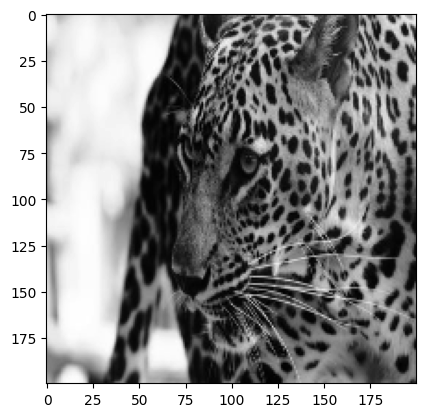

In [5]:
  for img in os.listdir(path):
        img_path = os.path.join(path, img)
        print("Image path:", img_path)


        img_array = cv2.imread(img_path)
        print(type(img_array))
        print(img_array.shape)

 # Convert the image to grayscale & Resize it

        img_array_gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
        print("Grayscale image shape:", img_array_gray.shape)

        img_array_gray = cv2.resize(img_array_gray, (200, 200))

        plt.imshow(img_array_gray, cmap='gray')
        plt.show()

        break



The code above loads and processes each image in a category by printing its path, type, and shape. It then converts the image to grayscale, resizes it to 200x200, and displays it using Matplotlib

100%|██████████| 31/31 [00:06<00:00,  4.99it/s]


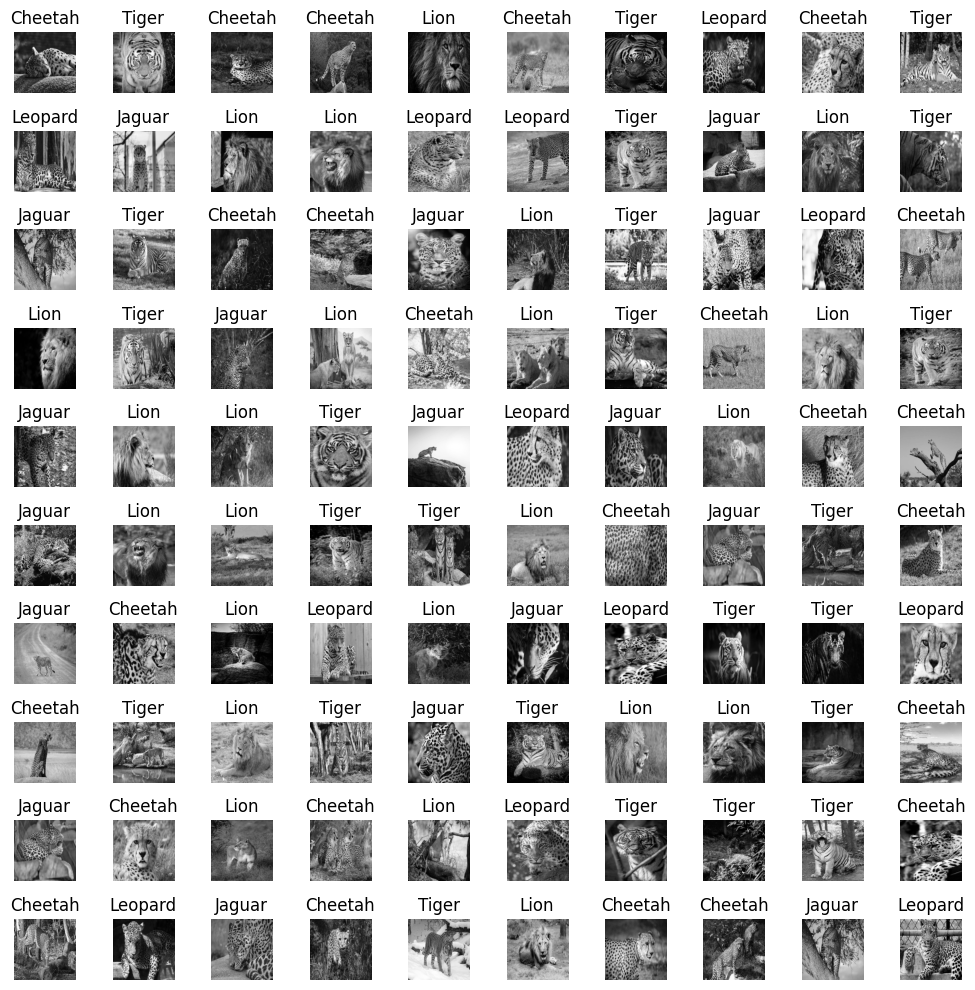

Categories: ['Cheetah', 'Jaguar', 'Tiger', 'Lion', 'Leopard']
Number of images: 170


In [6]:
# Load and preprocess images

train_data = []
categories = os.listdir(data_path)

# Iterate through each category


for c in categories:
    path = os.path.join(data_path, c)
    if os.path.isdir(path):
        for img in tqdm(os.listdir(path)):
            img_path = os.path.join(path, img)
            img_array = cv2.imread(img_path)
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
            img_array = cv2.resize(img_array, (200, 200))
            train_data.append((img_array, c))

# Shuffle the dataset for randomness


random.shuffle(train_data)


num_images = len(train_data)
grid_size = min(num_images, 100)


plt.figure(figsize=(10, 10))


# Display the  images and their labels


i = 0
for r in range(10):
    for c in range(10):
        if i >= grid_size:
            break
        plt.subplot(10, 10, i + 1)
        plt.imshow(train_data[i][0], cmap='gray')
        plt.title(train_data[i][1])
        plt.axis('off')
        i += 1

plt.tight_layout()
plt.show()


# Print dataset statistics


print("Categories:", categories)
print("Number of images:", num_images)

This code shuffles the data, displays a grid of images with their corresponding labels, and prints statistics about the categories and total number of images.

In [7]:
#5 folds for cross-validation

fold_size = len(train_data) //5
folds = [train_data[i*fold_size:(i+1)*fold_size] for i in range(5)]

for i, fold in enumerate(folds):
    print(f"Fold {i+1} has {len(fold)} images")

Fold 1 has 34 images
Fold 2 has 34 images
Fold 3 has 34 images
Fold 4 has 34 images
Fold 5 has 34 images


The code above splits the dataset into 5 folds for cross-validation and prints the number of images in each fold.

In [8]:
#Euclidean Distance Calculation

def euclidean_distance(img1, img2):
    return np.sqrt(np.sum((img1 - img2) ** 2))

sample_distance = euclidean_distance(train_data[0][0], train_data[1][0])
print(f"Sample Euclidean distance between first two images: {sample_distance}")


Sample Euclidean distance between first two images: 2029.4612585610005


The code above defines a function to calculate the Euclidean distance between two images and prints the distance between the first two images in the dataset.

In [9]:
#k-NN Implementation and Accuracy Calculation

import numpy as np
from sklearn.metrics import accuracy_score
from collections import Counter
k_values = range(1, 31)
accuracies = {k: [] for k in k_values}

for fold_index in range(5):

    validation_set = folds[fold_index]
    training_set = [item for i, fold in enumerate(folds) if i != fold_index for item in fold]


    train_images = np.array([data[0] for data in training_set])
    train_labels = np.array([data[1] for data in training_set])
    val_images = np.array([data[0] for data in validation_set])
    val_labels = np.array([data[1] for data in validation_set])

    print(f"Processing Fold {fold_index + 1}...")

    for k in k_values:
        val_predictions = []

        for val_img in val_images:

            distances = [euclidean_distance(val_img, train_img) for train_img in train_images]
            distance_label_pairs = list(zip(distances, train_labels))

            sorted_distances = sorted(distance_label_pairs, key=lambda x: x[0])
            k_nearest_neighbors = [label for _, label in sorted_distances[:k]]

            most_common_label = Counter(k_nearest_neighbors).most_common(1)[0][0]
            val_predictions.append(most_common_label)

        fold_accuracy = accuracy_score(val_labels, val_predictions)
        accuracies[k].append(fold_accuracy)
        print(f"Fold {fold_index + 1}, k = {k}, Accuracy = {fold_accuracy:.2f}")

Processing Fold 1...
Fold 1, k = 1, Accuracy = 0.32
Fold 1, k = 2, Accuracy = 0.32
Fold 1, k = 3, Accuracy = 0.35
Fold 1, k = 4, Accuracy = 0.38
Fold 1, k = 5, Accuracy = 0.38
Fold 1, k = 6, Accuracy = 0.41
Fold 1, k = 7, Accuracy = 0.44
Fold 1, k = 8, Accuracy = 0.32
Fold 1, k = 9, Accuracy = 0.35
Fold 1, k = 10, Accuracy = 0.32
Fold 1, k = 11, Accuracy = 0.29
Fold 1, k = 12, Accuracy = 0.29
Fold 1, k = 13, Accuracy = 0.29
Fold 1, k = 14, Accuracy = 0.26
Fold 1, k = 15, Accuracy = 0.26
Fold 1, k = 16, Accuracy = 0.21
Fold 1, k = 17, Accuracy = 0.24
Fold 1, k = 18, Accuracy = 0.18
Fold 1, k = 19, Accuracy = 0.15
Fold 1, k = 20, Accuracy = 0.12
Fold 1, k = 21, Accuracy = 0.15
Fold 1, k = 22, Accuracy = 0.15
Fold 1, k = 23, Accuracy = 0.15
Fold 1, k = 24, Accuracy = 0.12
Fold 1, k = 25, Accuracy = 0.09
Fold 1, k = 26, Accuracy = 0.09
Fold 1, k = 27, Accuracy = 0.15
Fold 1, k = 28, Accuracy = 0.12
Fold 1, k = 29, Accuracy = 0.15
Fold 1, k = 30, Accuracy = 0.15
Processing Fold 2...
Fold 2,

The code above implements k-NN classification for each fold in a 5-fold cross-validation process. For each fold, it calculates the accuracy for k-values ranging from 1 to 30 by computing the Euclidean distance between the validation images and training images, then predicting the label based on the k-nearest neighbors. It prints the accuracy for each fold and k-value.

In [10]:
#Calculate Avg Accuracies & Centroids

average_accuracies = {}

for k in k_values:
    average_accuracy = np.mean(accuracies[k])
    average_accuracies[k] = average_accuracy
    print(f"K = {k}, Average Accuracy across 5 folds: {average_accuracy:.2f}")

centroids = {k: np.mean(accuracies[k]) for k in k_values}

print("\nCentroid (Mean Accuracy) for each K:")
for k, centroid in centroids.items():
    print(f"K = {k}, Centroid (Mean Accuracy): {centroid:.2f}")


K = 1, Average Accuracy across 5 folds: 0.31
K = 2, Average Accuracy across 5 folds: 0.31
K = 3, Average Accuracy across 5 folds: 0.29
K = 4, Average Accuracy across 5 folds: 0.34
K = 5, Average Accuracy across 5 folds: 0.35
K = 6, Average Accuracy across 5 folds: 0.34
K = 7, Average Accuracy across 5 folds: 0.34
K = 8, Average Accuracy across 5 folds: 0.32
K = 9, Average Accuracy across 5 folds: 0.32
K = 10, Average Accuracy across 5 folds: 0.31
K = 11, Average Accuracy across 5 folds: 0.29
K = 12, Average Accuracy across 5 folds: 0.30
K = 13, Average Accuracy across 5 folds: 0.26
K = 14, Average Accuracy across 5 folds: 0.27
K = 15, Average Accuracy across 5 folds: 0.27
K = 16, Average Accuracy across 5 folds: 0.26
K = 17, Average Accuracy across 5 folds: 0.24
K = 18, Average Accuracy across 5 folds: 0.26
K = 19, Average Accuracy across 5 folds: 0.28
K = 20, Average Accuracy across 5 folds: 0.25
K = 21, Average Accuracy across 5 folds: 0.25
K = 22, Average Accuracy across 5 folds: 0.

The code calculates and prints the average accuracy across 5 folds for each k-value, and computes the centroid (mean accuracy) for each k.

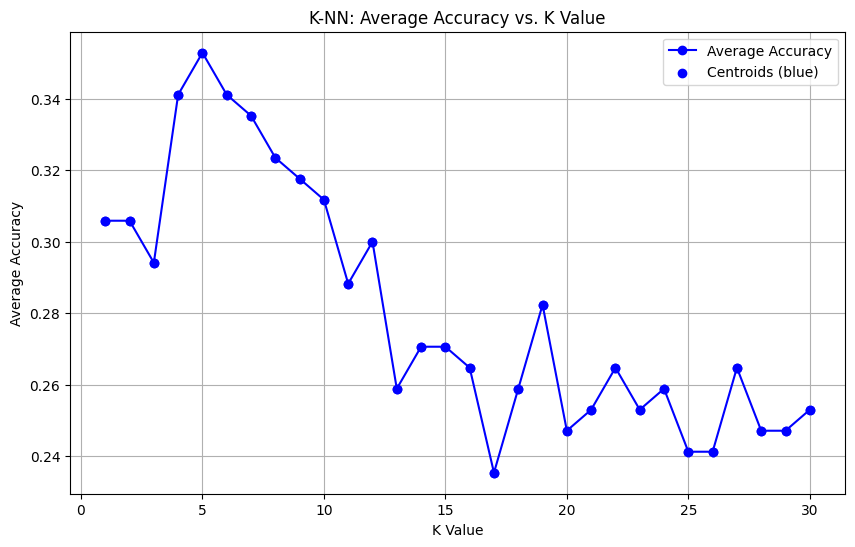

In [12]:
# Visualization of Results
k_values = list(average_accuracies.keys())
average_accuracy_values = list(average_accuracies.values())

plt.figure(figsize=(10, 6))
plt.plot(k_values, average_accuracy_values, marker='o', linestyle='-', color='b', label="Average Accuracy")
plt.scatter(k_values, average_accuracy_values, color='b', label="Centroids (blue)")
plt.xlabel("K Value")
plt.ylabel("Average Accuracy")
plt.title("K-NN: Average Accuracy vs. K Value")
plt.grid(True)
plt.legend()

plt.show()


The code visualizes the average accuracy for each k-value by plotting a line graph with centroids marked, showing the relationship between k-values and their corresponding accuracies














The above code is part of a basic assignment in my Computer Vision and Pattern Recognition (CVPR) course. The primary requirements of the assignment are outlined below, followed by a summary of the steps we took to meet those requirements.

#Assignment Requirements :

### 1. Dataset Preparation
- Load the Wild Animals Dataset.
- Preprocess the images by converting them to grayscale and resizing them to uniform dimensions.

### 2. 5-Fold Cross-Validation
- Split the dataset into 5 folds.
- Use one fold as the validation set and the remaining four for training, rotating through all folds.

### 3. k-NN Classification
- For k values ranging from 1 to 30, compute the Euclidean distances between images.
- Identify the k-nearest neighbors and predict the labels based on the majority class.

### 4. Accuracy and Centroid Calculation
- Compute the accuracy for each fold and each value of k.
- Calculate the average accuracy (centroid) across the 5 folds for each value of k.

### 5. Visualization and Submission
- Plot the relationship between k values and average accuracy, with centroids connected by a line.
- Submit a clear and organized notebook to GitHub.



#summary of the steps we took:

### 1. Dataset Preparation
- We loaded the Wild Animals Dataset from Google Drive.
- Each image was converted to grayscale and resized to uniform dimensions of 200x200 pixels.

### 2. 5-Fold Cross-Validation
- The dataset was split into 5 folds for cross-validation.
- For each fold, one fold was used as the validation set, and the remaining four folds were used for training, ensuring all parts of the dataset were used for both training and validation.

### 3. k-NN Classification
- We implemented the k-Nearest Neighbors (k-NN) algorithm, where for each test image, we computed the Euclidean distance to all training images.
- For each k-value (from 1 to 30), we identified the k-nearest neighbors and assigned the most common label as the predicted class.

### 4. Accuracy and Centroid Calculation
- We calculated the accuracy for each fold and each k-value, measuring how well the model performed on the validation set.
- The average accuracy (centroid) across the 5 folds was computed for each k-value, helping to determine the optimal k.

### 5. Visualization and Submission
- We visualized the relationship between k-values and average accuracy using a line plot, with centroids (mean accuracies) marked for each k.
- The final organized notebook was prepared for submission on GitHub, showcasing the complete analysis and results.
